# Ornstein-Uhlenbeck Process

The $\text{AR}(1)$ process with constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where $\varepsilon_t \sim \text{Normal}(0, 1)$.

Subtracting $X_{t-1}$ from both sides gives,

$
\begin{align}
\Delta X_t = \left ( \varphi - 1 \right) X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

This can be reparameterized to,

$
\begin{align}
\Delta X_t = \lambda \left( \mu - X_{t-1} \right) + \sigma \varepsilon_t
\end{align}
$

where $\lambda = 1 - \varphi$ and $\mu = \frac{\mu^*}{\lambda}$.

The continuous differential form of this equation is the Ornstein-Uhlenbeck SDE,

$
\begin{align}
dX_t = \lambda \left( \mu - X_t \right) dt + \sigma dB_t
\end{align}
$

where $dB_t \sim \text{Normal}(0, dt)$. The Ornstein-Uhlenbeck SDE models a mean reverting random process and can be solved using</br>
the integration factor, $e^{\lambda t}$

$
\begin{align}
X_t = X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right) + \sigma \int_0^t e^{-\lambda\left( t - s \right)} dB_s \hspace{35pt} (1)
\end{align}
$

## Mean, Variance and Autocovariance

The mean of $X_t$ as a function of time is obtained by taking expectation of equation $(1)$ and noting that since the last term</br>
is a martingale,

$
\begin{align}
\text{E}\left[ \int_0^t e^{-\lambda\left( s - t \right)} dB_s \right] = 0
\end{align}
$

thus,

$
\begin{align}
\text{E}\left[ X_t \right] = X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right)\hspace{89pt} (2)
\end{align}
$

The variance is given by,

$
\begin{align}
\text{Var}(X_t) &= \text{E}\left[\left( X_t - E\left( X_t \right) \right)^2 \right]
\end{align}
$

Since,

$
\begin{align}
X_t - \text{E}(X_t) = \sigma \int_0^t e^{-\lambda \left( t - s \right) } dB_s
\end{align}
$

and Itô isometery implies that,

$
\begin{align}
\text{Var}(X_t) &= \text{E} \left[ \sigma^2  \left( \int_0^t e^{-\lambda \left( t - s \right)} \right)^2 \right] \\
&= \sigma^2 \text{E} \left[ \int_0^t e^{-2\lambda \left( t - s \right) } ds \right] \\
&= \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right) \hspace{112pt} (3)
\end{align}
$

Similarly the autocovariance for $t>s$ is given by,

$
\begin{align}
\text{Cov}\left( X_s X_t \right) = \frac{\sigma^2}{2\lambda} \left[ e^{-\lambda \left( t-s \right)} - e^{-\lambda \left( t+s \right)} \right]
\end{align}
$

## Limiting Values of Mean, Variance and Autocovariance

The limits of equations $(2)$, $(3)$ and $(4)$ as $t \to \infty$ require $\lambda > 0$. Making this assumption it follows that,

$
\begin{align}
&\lim_{t \to \infty} \text{E}\left( X_t \right) = \mu \\
&\lim_{t \to \infty} \text{Var} \left( X_t \right) = \frac{\sigma^2}{2\lambda} \\
&\lim_{t \to \infty} \text{Cov} \left( X_t X_s \right) = 0
\end{align}
$

This limit is equivalent to stationarity in the $\text{AR}(1)$ model so it is interesting to compare the results for the mean and variance. Recall</br>
that for $\text{AR}(1)$ with an offset $\mu^*$,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

Using the relations $\lambda = 1 - \varphi$ and $\mu = \frac{\mu^*}{\lambda}$, the $\text{AR}(1)$ limit of $\text{E}(X_t)$ becomes,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \mu \\
\end{align}
$

The results are the same while for the variance they differ. It will later be seen that this is a consequence of taking the continuous limit</br>
and that for a discrete limit the result is recovered.

## Half Life of Mean Decay

Previously it was shown that,

$
\begin{align}
\text{E}\left[ X_t \right] = X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right)
\end{align}
$

and for the limit $t \to \infty$,

$
\begin{align}
\text{E}\left[ X_t \right] = \mu
\end{align}
$

The half life of mean decay is the time to reach $\frac{1}{2}$ the $t \to \infty$ value from the initial value. This defines the timescale</br>
of the Ornstein-Uhlenbeck process. If $t_H$ denotes the half life. It follows that,

$
\begin{align}
X_{t_H} = X_0 + \frac{1}{2}\left( \mu - X_0 \right)
\end{align}
$

Solving the equation,

$
\begin{align}
X_0 e^{-\lambda t_H} + \mu \left( 1 - e^{-\lambda t_H} \right) = X_0 + \frac{1}{2}\left( \mu - X_0 \right)
\end{align}
$

gives

$
\begin{align}
t_H = \frac{\ln{2}}{\lambda}
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (OU, Stats)
from lib import (stack, comparison, curve, fcurve, fpoints)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [35]:
def ensemble_mean_plot(**params):
    xt = OU.Source.PROC.create_ensemble(500, **params)
    ensemble_mean = Stats.Func.MEAN.apply_to_ensemble(xt, **params)
    params["npts"] = 15
    mean = OU.Func.MEAN.apply(ensemble_mean, **params)
    fpoints(data=ensemble_mean, func=mean)
    
def asymptotic_mean_plot(**params):
    xt = OU.Source.PROC.create(**params)
    cumu_mean = Stats.Func.CUMU_MEAN.apply(xt, **params)
    mean = OU.Func.MEAN_LIMIT.apply(cumu_mean, **params)
    fcurve(data=cumu_mean, func=mean)
    
def ensemble_var_plot(**params):
    xt = OU.Source.PROC.create_ensemble(1000, **params)
    ensemble_var = Stats.Func.VAR.apply_to_ensemble(xt, **params)
    params["npts"] = 15
    var = OU.Func.VAR.apply(ensemble_var, **params)
    fpoints(data=ensemble_var, func=var)
    
def asymptotic_var_plot(**params):
    xt = OU.Source.PROC.create(**params)
    cumu_var = Stats.Func.CUMU_VAR.apply(xt, **params)
    var = OU.Func.VAR_LIMIT.apply(cumu_var, **params)
    fcurve(data=cumu_var, func=var)

## Mean

The mean as a function time for the Ornstein-Uhlenbeck process is given by,

$
\begin{align}
\mu_t = X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right)
\end{align}
$

Here a scan of parameters is performed.

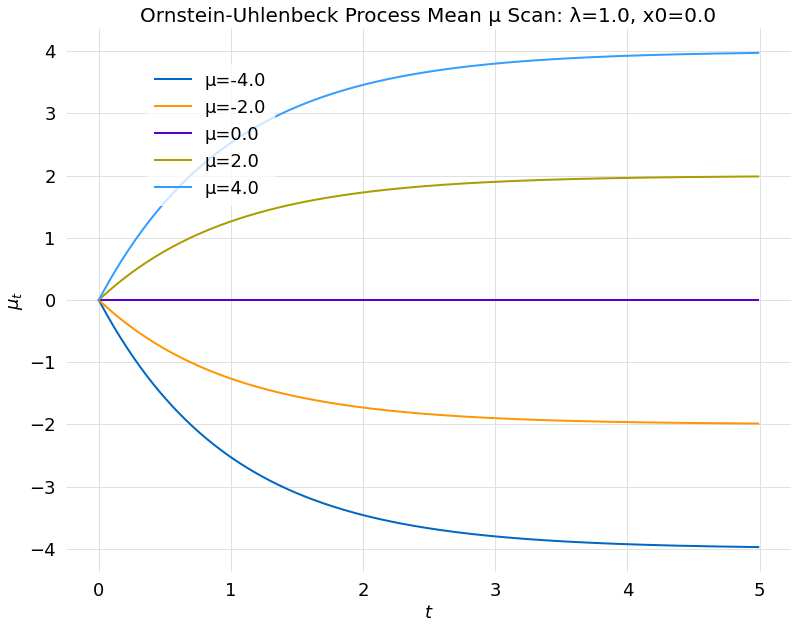

In [3]:
μ_vals = [-4.0, -2.0, 0.0, 2.0, 4.0]
λ = 1.0
x0 = 0.0
npts = 500
Δt = 0.01
labels = [f"μ={val}" for val in μ_vals]
params = [{"μ": μ, "λ": λ, "x0": x0, "npts": npts, "Δx": Δt} for μ in μ_vals]
title = f"Ornstein-Uhlenbeck Process Mean μ Scan: λ={λ}, x0={x0}"
scan = OU.Func.MEAN.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

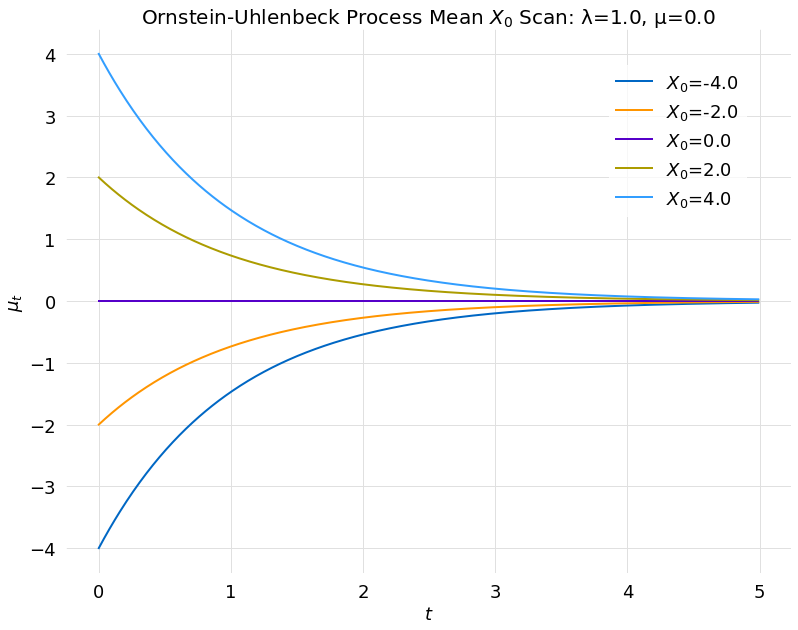

In [4]:
x0_vals = [-4.0, -2.0, 0.0, 2.0, 4.0]
λ = 1.0
μ = 0.0
npts = 500
Δt = 0.01
labels = [f"$X_0$={val}" for val in x0_vals]
params = [{"μ": μ, "λ": λ, "x0": x0, "npts": npts, "Δx": Δt} for x0 in x0_vals]
title = f"Ornstein-Uhlenbeck Process Mean $X_0$ Scan: λ={λ}, μ={μ}"
scan = OU.Func.MEAN.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

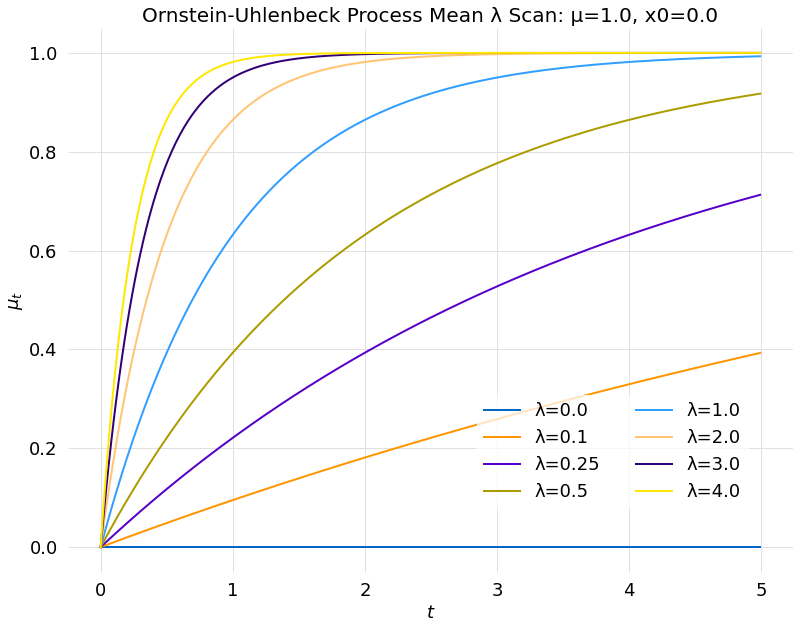

In [5]:
λ_vals = [0.0, 0.1, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0]
μ = 1.0
x0 = 0.0
npts = 500
Δt = 0.01
labels = [f"λ={val}" for val in λ_vals]
params = [{"μ": μ, "λ": λ, "x0": x0, "npts": npts, "Δx": Δt} for λ in λ_vals]
title = f"Ornstein-Uhlenbeck Process Mean λ Scan: μ={μ}, x0={x0}"
scan = OU.Func.MEAN.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

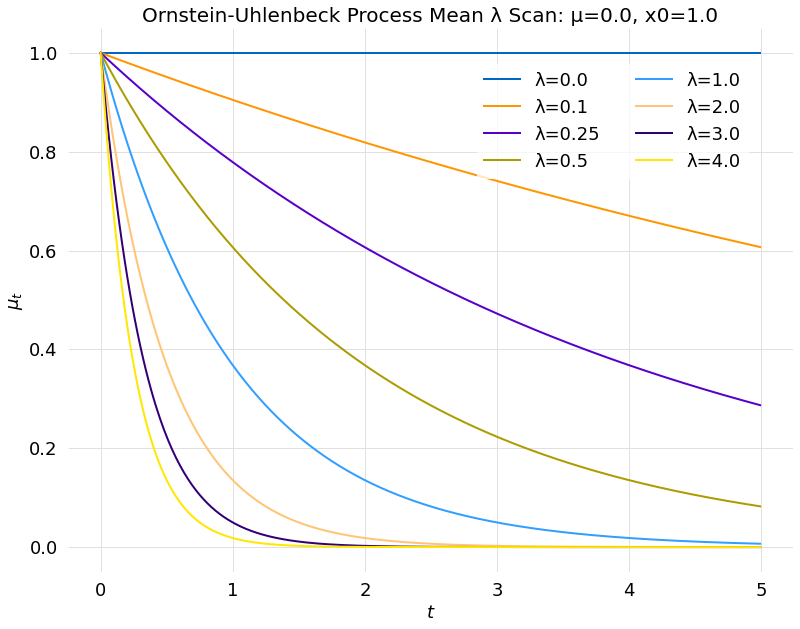

In [6]:
λ_vals = [0.0, 0.1, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0]
μ = 0.0
x0 = 1.0
npts = 500
Δt = 0.01
labels = [f"λ={val}" for val in λ_vals]
params = [{"μ": μ, "λ": λ, "x0": x0, "npts": npts, "Δx": Δt} for λ in λ_vals]
title = f"Ornstein-Uhlenbeck Process Mean λ Scan: μ={μ}, x0={x0}"
scan = OU.Func.MEAN.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

### Mean Validation

The expression obtained for the mean is compared with the result obtained from an ensemble simulation for a range of parameters,

$
\begin{align}
\mu_t = X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right)
\end{align}
$

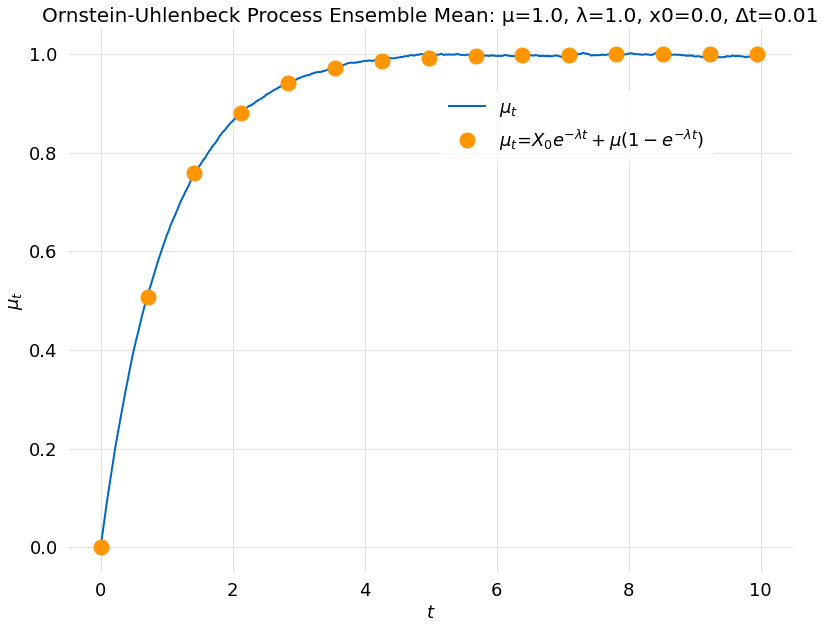

In [7]:
Δt = 0.01
μ = 1.0
λ = 1.0
x0 = 0.0
npts = 1000
params = {"μ": μ, "λ": λ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_mean_plot(**params)

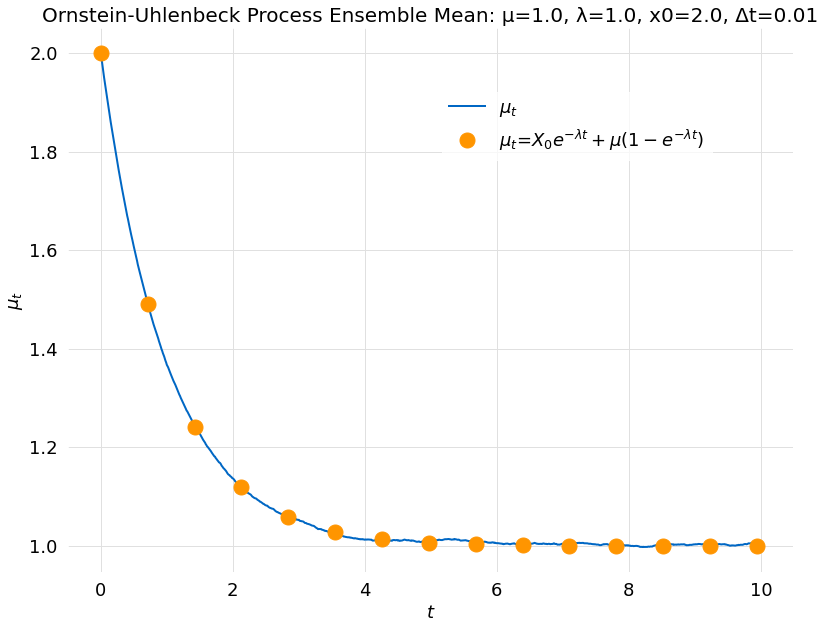

In [8]:
Δt = 0.01
μ = 1.0
λ = 1.0
σ = 1.0
x0 = 2.0
npts = 1000
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_mean_plot(**params)

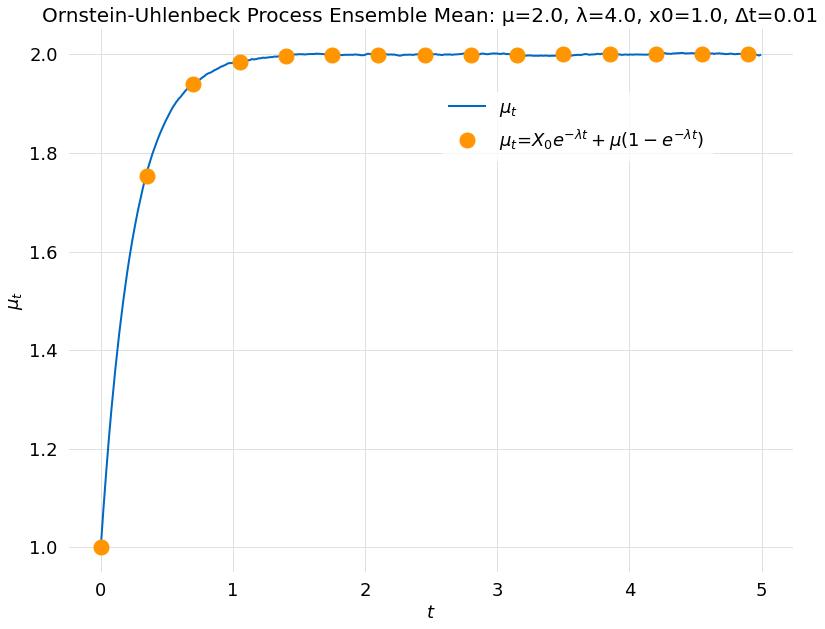

In [9]:
Δt = 0.01
μ = 2.0
λ = 4.0
σ = 1.0
x0 = 1.0
npts = 500
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_mean_plot(**params)

### Convergence to Time Asymptotic Mean

The time asymptotic mean is given by,

$
\begin{align}
\lim_{t \to \infty} \mu_t = \mu
\end{align}
$

This expression is verified for a range of parameters.

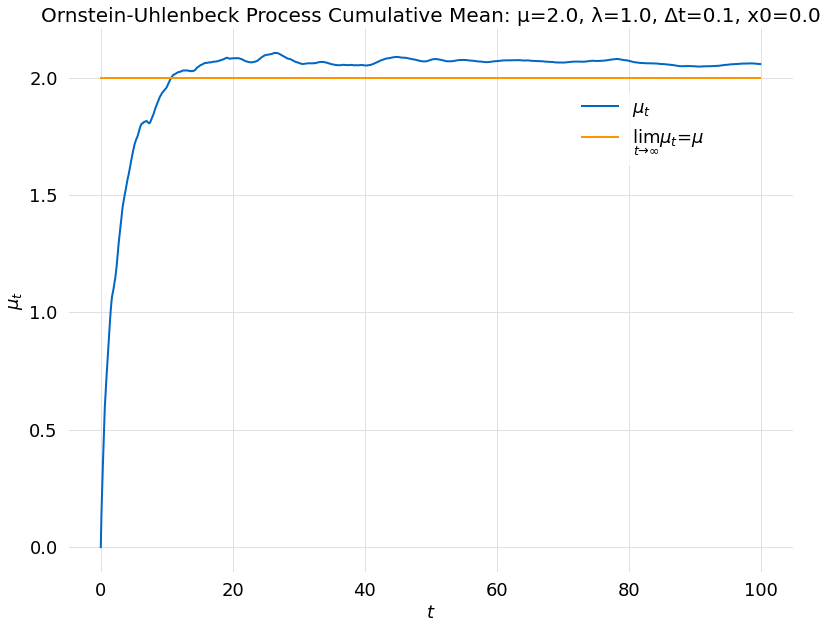

In [10]:
Δt = 0.1
μ = 2.0
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 1000
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_mean_plot(**params)

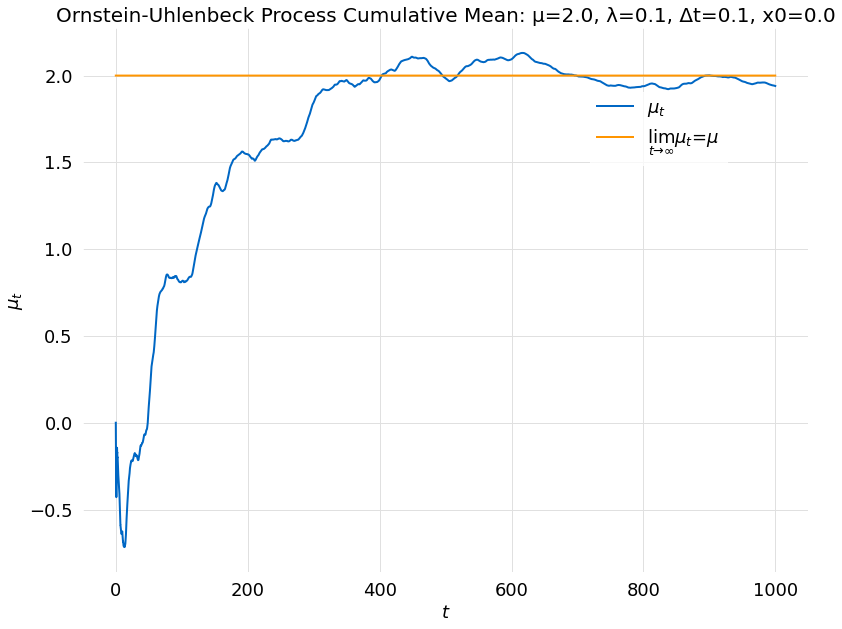

In [11]:
Δt = 0.1
μ = 2.0
λ = 0.1
σ = 2.0
x0 = 0.0
npts = 10000
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_mean_plot(**params)

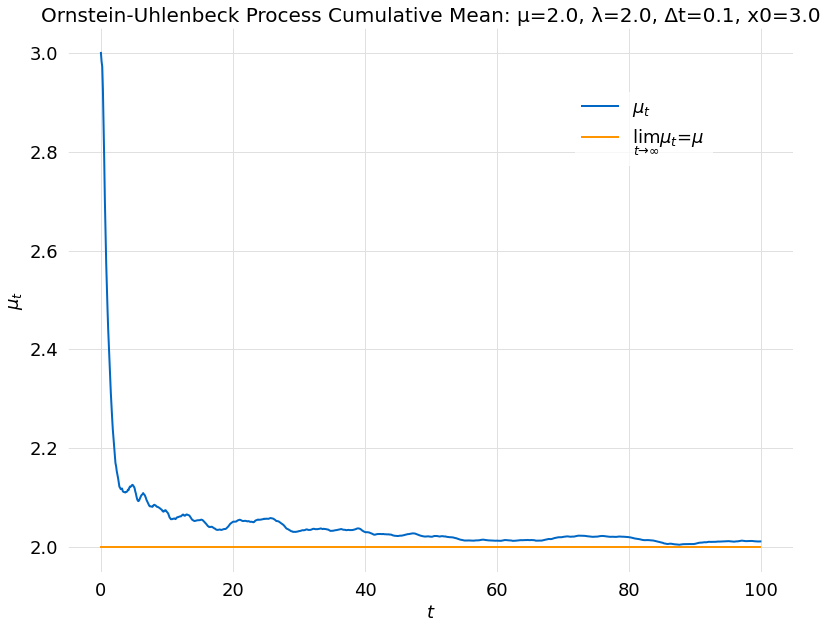

In [12]:
Δt = 0.1
μ = 2.0
λ = 2.0
σ = 1.0
x0 = 3.0
npts = 1000
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_mean_plot(**params)

## Variance

The variance as a function time for the Ornstein-Uhlenbeck process is given by,

$
\begin{align}
\sigma^2_t = \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)
\end{align}
$

Here a parameter scan is performed.

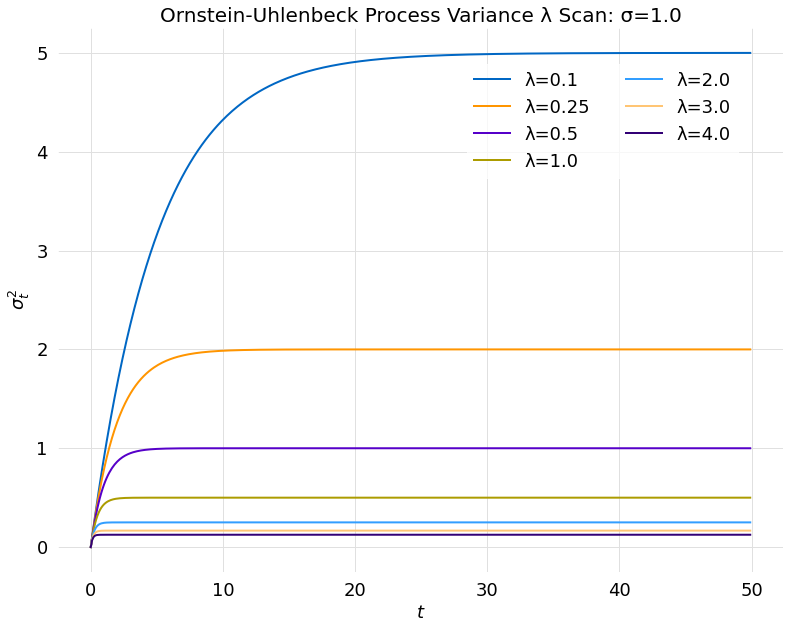

In [13]:
λ_vals = [0.1, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0]
σ = 1.0
npts = 500
Δt = 0.1
labels = [f"λ={val}" for val in λ_vals]
params = [{"λ": λ, "σ": σ, "npts": npts, "Δx": Δt} for λ in λ_vals]
title = f"Ornstein-Uhlenbeck Process Variance λ Scan: σ={σ}"
scan = OU.Func.VAR.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

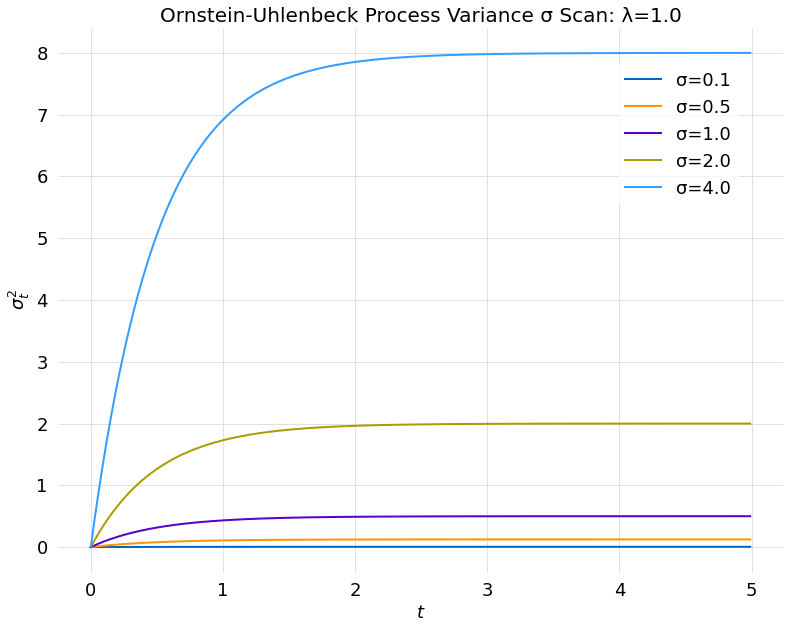

In [14]:
σ_vals = [0.1, 0.5, 1.0, 2.0, 4.0]
λ = 1.0
npts = 500
Δt = 0.01
labels = [f"σ={val}" for val in σ_vals]
params = [{"λ": λ, "σ": σ, "npts": npts, "Δx": Δt} for σ in σ_vals]
title = f"Ornstein-Uhlenbeck Process Variance σ Scan: λ={λ}"
scan = OU.Func.VAR.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)

### Variance Validation

The expression obtained for the variance is compared with the result obtained from an ensemble simulation for a range of parameters,

$
\begin{align}
\sigma^2_t = \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)
\end{align}
$


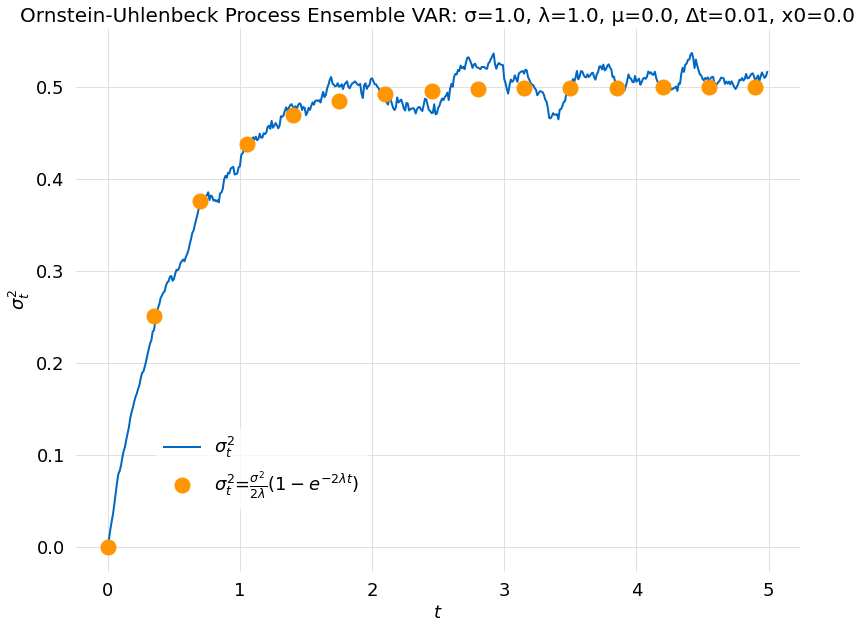

In [15]:
Δt = 0.01
λ = 1.0
σ = 1.0
npts = 500
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_var_plot(**params)

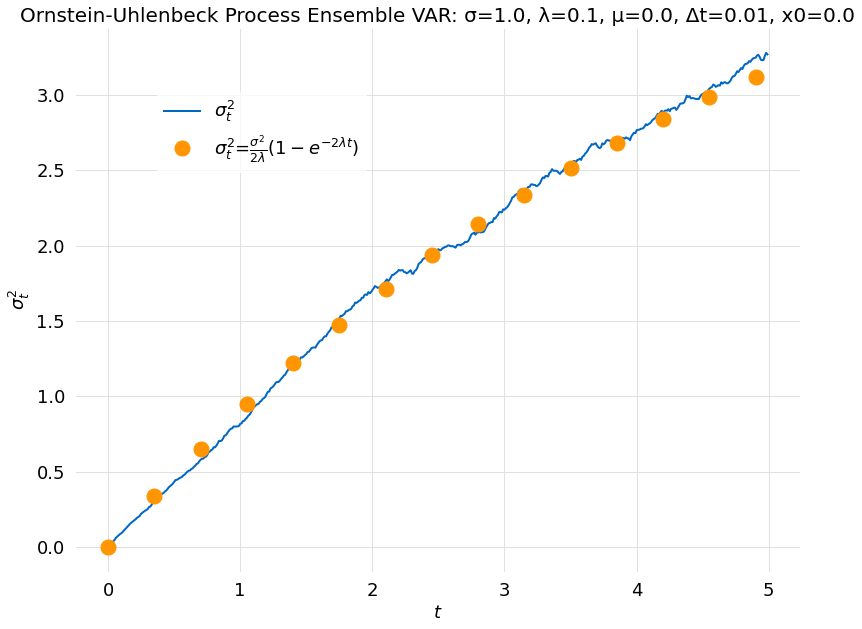

In [16]:
Δt = 0.01
λ = 0.1
σ = 1.0
npts = 500
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_var_plot(**params)

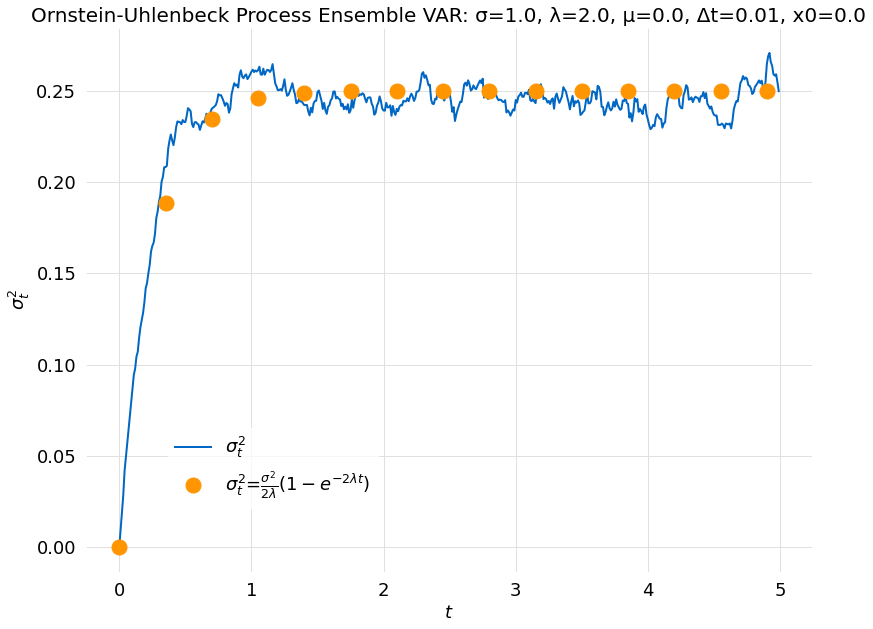

In [17]:
Δt = 0.01
λ = 2.0
σ = 1.0
npts = 500
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_var_plot(**params)

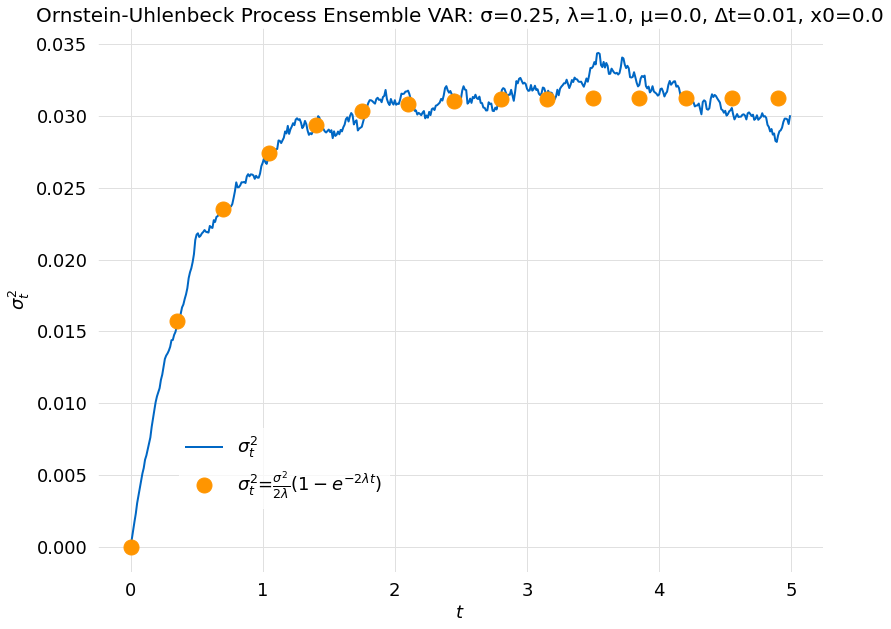

In [19]:
Δt = 0.01
λ = 1.0
σ = 0.25
npts = 500
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_var_plot(**params)

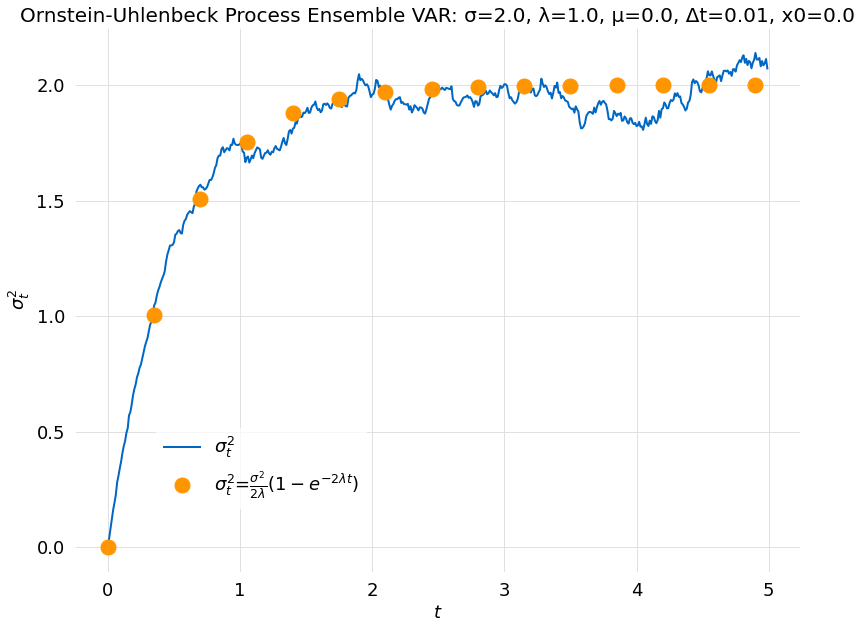

In [20]:
Δt = 0.01
λ = 1.0
σ = 2.0
npts = 500
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
ensemble_var_plot(**params)

### Convergence to Time Asymptotic Variance

The time asymptotic mean is given by,

$
\begin{align}
\lim_{t \to \infty} \text{Var} \left( X_t \right) = \frac{\sigma^2}{2\lambda}
\end{align}
$

This expression is verified for a range of parameters.

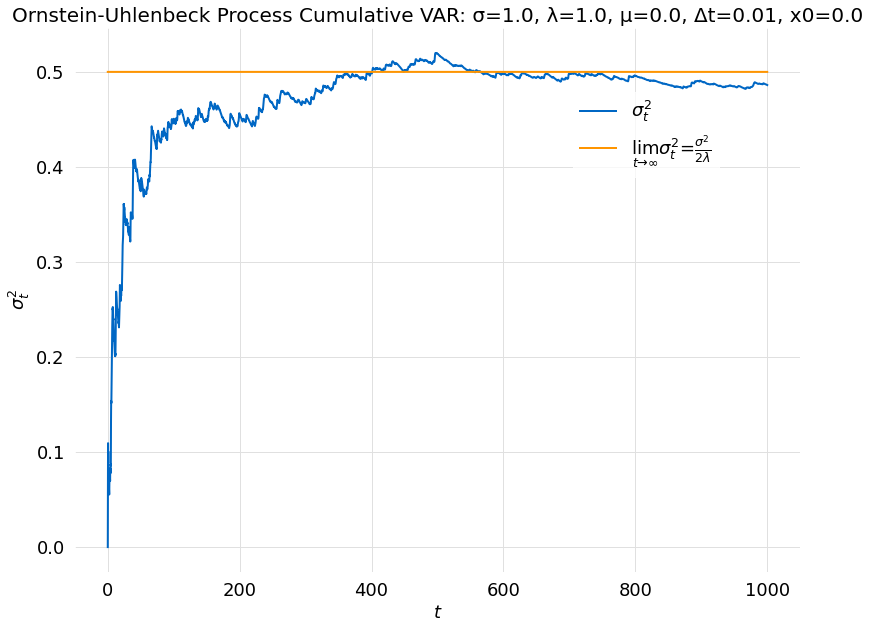

In [51]:
Δt = 0.01
λ = 1.0
σ = 1.0
npts = 100000
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_var_plot(**params)

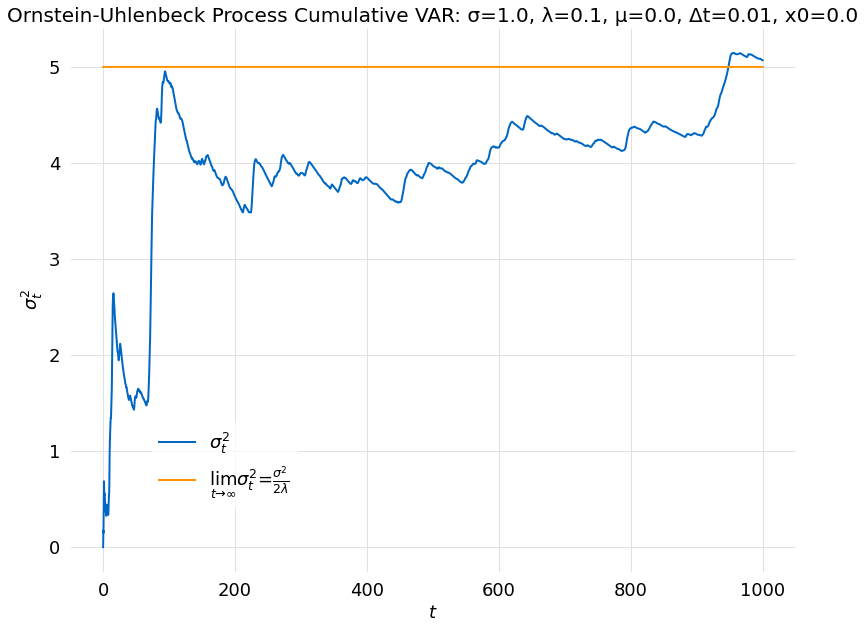

In [59]:
Δt = 0.01
λ = .1
σ = 1.0
npts = 100000
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_var_plot(**params)

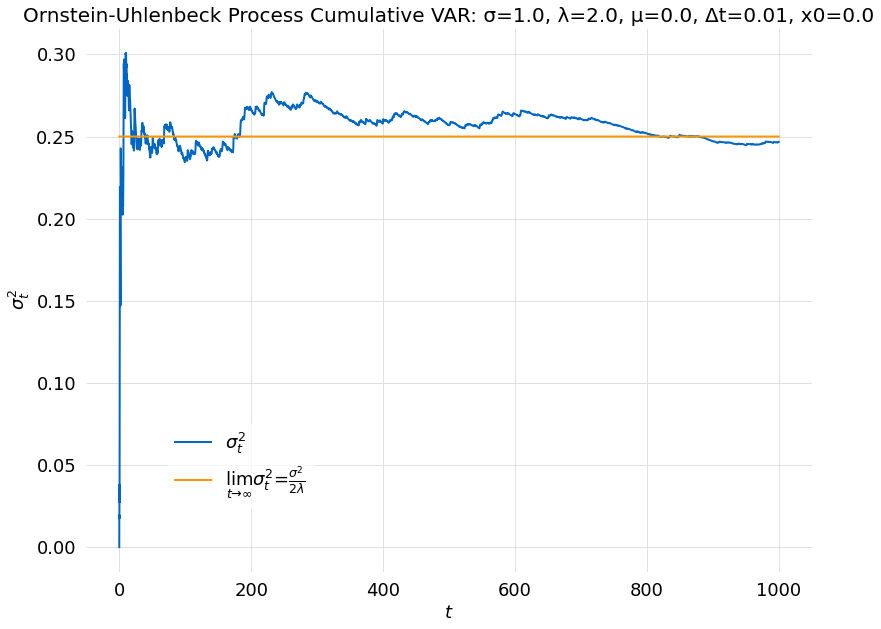

In [53]:
Δt = 0.01
λ = 2.0
σ = 1.0
npts = 100000
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_var_plot(**params)

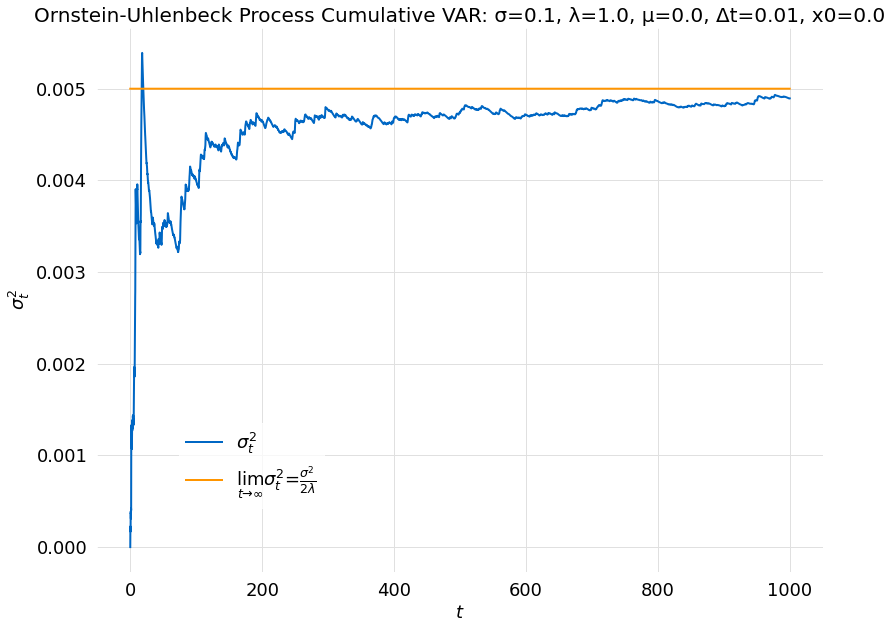

In [64]:
Δt = 0.01
λ = 1.0
σ = .1
npts = 100000
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_var_plot(**params)

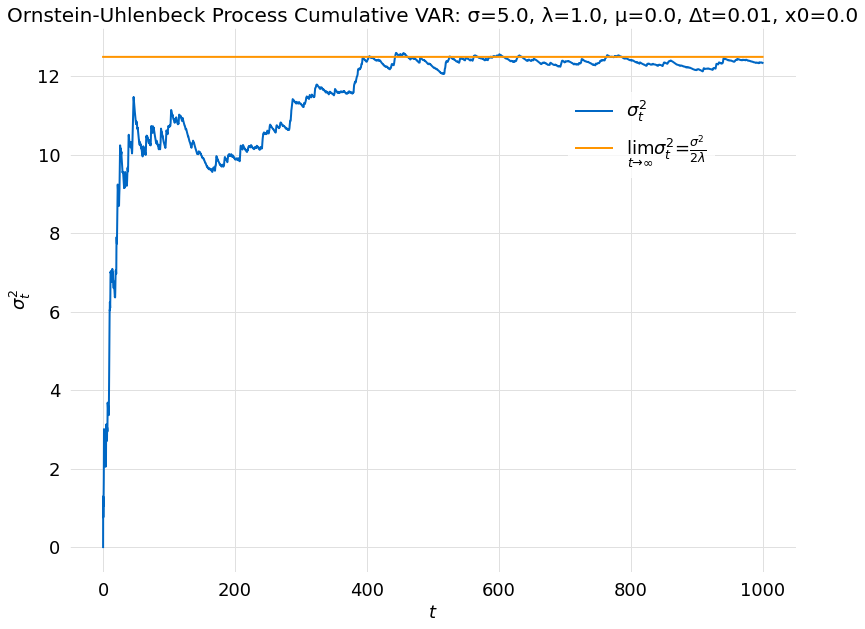

In [63]:
Δt = 0.01
λ = 1.0
σ = 5.0
npts = 100000
params = {"λ": λ, "σ": σ, "npts": npts, "Δt": Δt, "Δx": Δt}
asymptotic_var_plot(**params)

## Autocovariance

The autocovariance as a function time for the Ornstein-Uhlenbeck process is given by,

$
\begin{align}
\text{Cov}\left( X_s X_t \right) = \frac{\sigma^2}{2\lambda} \left[ e^{-\lambda \left( t-s \right)} - e^{-\lambda \left( t+s \right)} \right]
\end{align}
$

Here a parameter scan is performed.

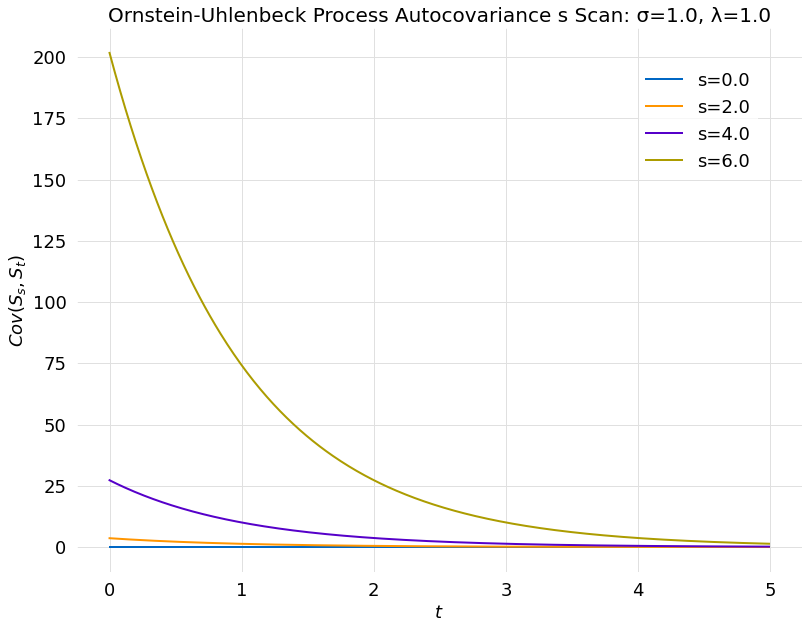

In [75]:
s_vals = [0.0, 2.0, 4.0, 6.0]
λ = 1.0
σ = 1.0
npts = 500
Δt = 0.01
labels = [f"s={val}" for val in s_vals]
params = [{"λ": λ, "σ": σ, "s": s, "npts": npts, "Δx": Δt} for s in s_vals]
title = f"Ornstein-Uhlenbeck Process Autocovariance s Scan: σ={σ}, λ={λ}"
scan = OU.Func.COV.create_parameter_scan(*params)
comparison(scan, title=title, labels=labels)